In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Create Dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv');
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Data analysis

In [3]:
print(dataset.shape)
dataset.dropna(subset=['Cabin'], inplace=True)
print('After NA removal', dataset.shape)

(8693, 14)
After NA removal (8494, 14)


<AxesSubplot:>

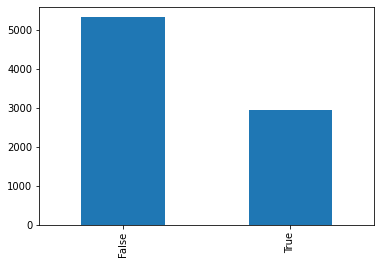

In [4]:
dataset['CryoSleep'].value_counts().plot.bar()

<AxesSubplot:>

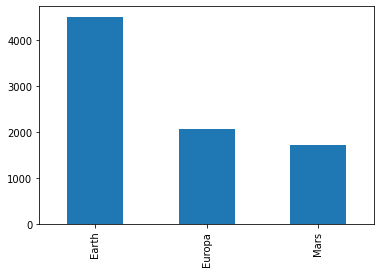

In [5]:
dataset['HomePlanet'].value_counts().plot.bar()

## Split cabin infos

In [6]:
dataset[['Deck', 'RoomNumber', 'Side']] = dataset['Cabin'].str.split('/', expand=True)
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,RoomNumber,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


<AxesSubplot:>

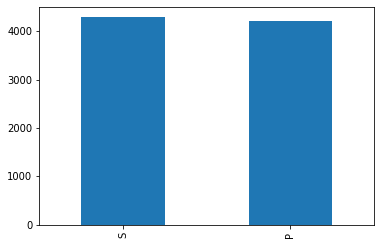

In [7]:
dataset['Side'].value_counts().plot.bar()

<AxesSubplot:>

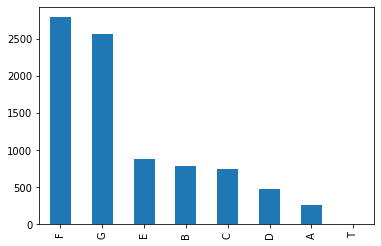

In [8]:
dataset['Deck'].value_counts().plot.bar()

<AxesSubplot:>

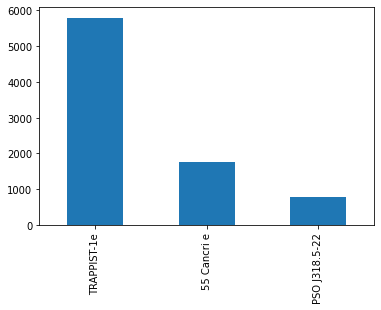

In [9]:
dataset['Destination'].value_counts().plot.bar()

In [10]:
# Convert room number to uint
dataset['RoomNumber'] = pd.to_numeric(dataset['RoomNumber'], downcast='unsigned')

count    8494.000000
mean      600.367671
std       511.867226
min         0.000000
25%       167.250000
50%       427.000000
75%       999.000000
max      1894.000000
Name: RoomNumber, dtype: float64

<AxesSubplot:ylabel='Frequency'>

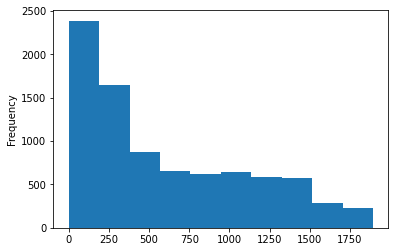

In [11]:
display(dataset['RoomNumber'].describe())
dataset['RoomNumber'].plot.hist()

<AxesSubplot:>

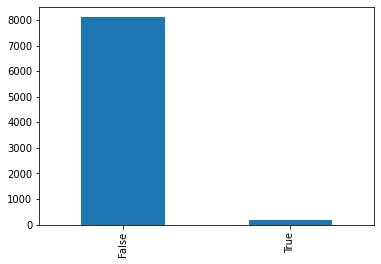

In [12]:
dataset['VIP'].value_counts().plot.bar()

count    8319.000000
mean       28.820411
std        14.488090
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

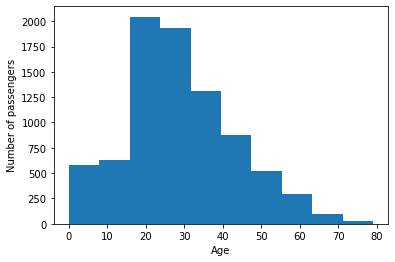

In [13]:
display(dataset['Age'].describe())
plt.hist(dataset['Age'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.show()

## Bivariable analysis

In [14]:
def cat_plot(column):
    fig, ax = plt.subplots()
    value_counts_trans = dataset[dataset['Transported']][column].value_counts()
    value_counts_nottrans = dataset[~dataset['Transported']][column].value_counts()
    labels = value_counts_trans.index.values
    x = np.arange(len(labels))

    width = 0.35
    ax.bar(x - width/2, value_counts_trans.values, width, label='Transported')
    ax.bar(x + width/2, value_counts_nottrans.values, width, label='Not Transported')
    ax.set_xlabel(column)
    ax.set_ylabel('Number of passenger')
    ax.set_xticks(x, labels)
    ax.legend()
    plt.show()
    
def int_plot(column):
    plt.hist([dataset[dataset['Transported']][column], dataset[~dataset['Transported']][column]], label=['Transported', 'Not Transported'])
    plt.xlabel(column)
    plt.ylabel('Number of passenger')
    plt.legend()
    plt.show()

,Side,Transported
Side,1.000000,0.103775
Transported,0.103775,1.000000


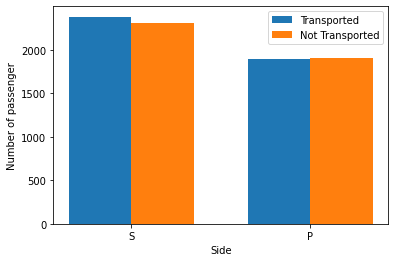

In [15]:
encodedSide = dataset['Side'].map({'P': 0, 'S': 1})
encodedTransported = dataset['Transported'].map({False: 0, True: 1})
display(pd.concat([encodedSide, encodedTransported], axis=1).corr())
pd.crosstab(dataset['Side'], dataset['Transported'])

cat_plot('Side')

A bit more of passengers on starboard were transported but the pearson correlation is very low.


,Deck,Transported
Deck,1.000000,-0.116462
Transported,-0.116462,1.000000


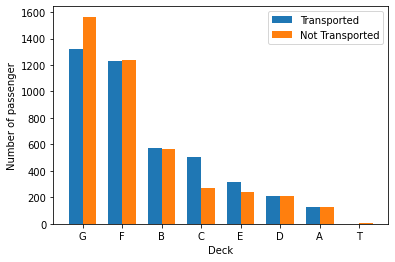

In [16]:
encodedDeck = dataset['Deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7})
display(pd.concat([encodedDeck, encodedTransported], axis=1).corr())
pd.crosstab(dataset['Deck'], dataset['Transported'])

cat_plot('Deck')

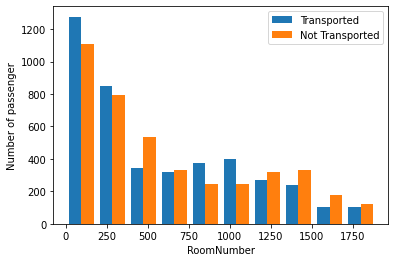

In [17]:
pd.concat([dataset['RoomNumber'], encodedTransported], axis=1).corr()
int_plot('RoomNumber')

,VIP,Transported
VIP,1.000000,-0.035406
Transported,-0.035406,1.000000


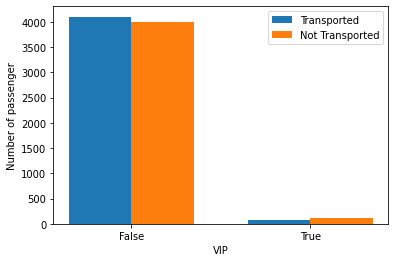

In [18]:
encodedVIP = dataset['VIP'].map({False: 0, True: 1})
display(pd.concat([encodedVIP, encodedTransported], axis=1).corr())
pd.crosstab(dataset['VIP'], dataset['Transported'])

cat_plot('VIP')

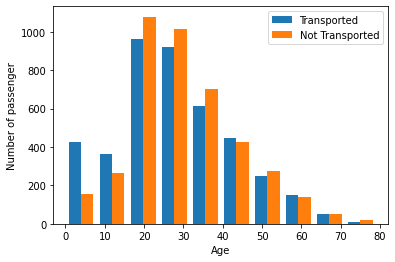

In [19]:
pd.concat([dataset['Age'], encodedTransported], axis=1).corr()
int_plot('Age')

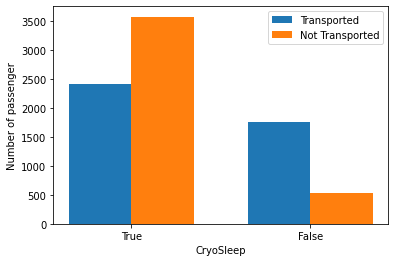

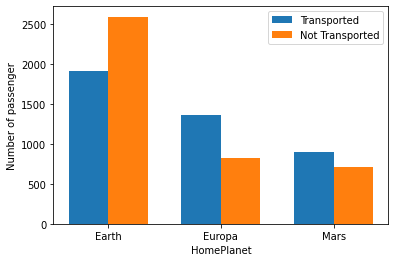

In [20]:
encodedCryo = dataset['CryoSleep'].map({False: 0, True: 1})
cat_plot('CryoSleep')
encodedHome = pd.get_dummies(dataset['HomePlanet'])
cat_plot('HomePlanet')

In [21]:
pd.crosstab(dataset['HomePlanet'], dataset['CryoSleep'])

CryoSleep,False,True
HomePlanet,,
Earth,3051,1346
Europa,1131,882
Mars,1027,654


Analysing RoomService


count    8317.000000
mean      221.954671
std       640.734593
min         0.000000
25%         0.000000
50%         0.000000
75%        48.000000
max      9920.000000
Name: RoomService, dtype: float64

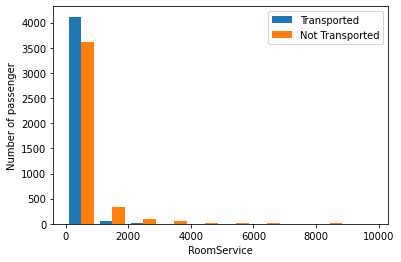

Analysing FoodCourt


count     8316.000000
mean       457.992665
std       1616.551099
min          0.000000
25%          0.000000
50%          0.000000
75%         78.250000
max      29813.000000
Name: FoodCourt, dtype: float64

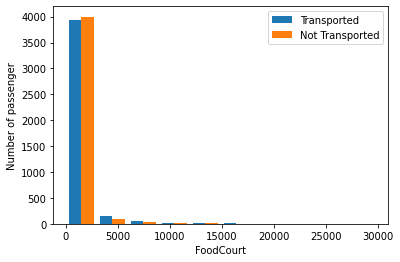

Analysing ShoppingMall


count     8288.000000
mean       174.700531
std        608.668091
min          0.000000
25%          0.000000
50%          0.000000
75%         28.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

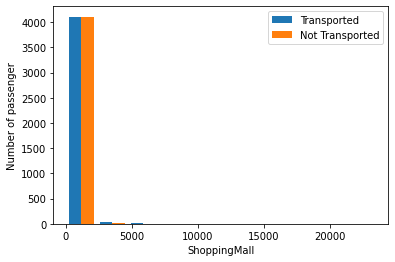

Analysing Spa


count     8313.000000
mean       306.623120
std       1119.076668
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

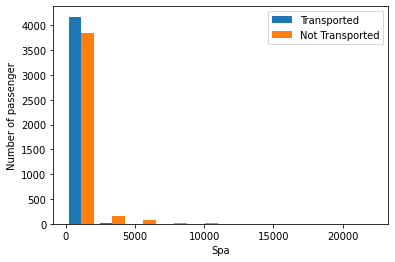

Analysing VRDeck


count     8310.000000
mean       306.132371
std       1148.895082
min          0.000000
25%          0.000000
50%          0.000000
75%         46.750000
max      24133.000000
Name: VRDeck, dtype: float64

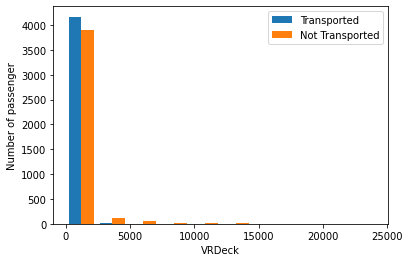

In [22]:
for column in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    print('Analysing', column)
    display(dataset[column].describe())
    int_plot(column)

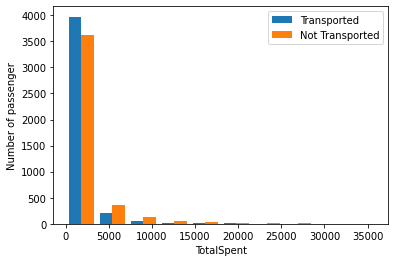

In [23]:
dataset['TotalSpent'] = dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
int_plot('TotalSpent')

## Get most corrolated values

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RoomNumber,TotalSpent,Deck,Side,VIP,CryoSleep,Earth,Europa,Mars
Age,1.000000,0.070586,0.129999,0.034103,0.122365,0.101069,-0.077213,-0.132255,0.186249,-0.248003,0.011640,0.092592,-0.073938,-0.198902,0.217664,0.015660
RoomService,0.070586,1.000000,-0.018380,0.054638,0.013700,-0.020419,-0.248758,-0.008986,0.229522,-0.026783,-0.012290,0.045832,-0.258782,-0.140647,-0.076557,0.258430
FoodCourt,0.129999,-0.018380,1.000000,-0.013322,0.217284,0.224099,0.048559,-0.183429,0.745822,-0.324348,0.020149,0.129402,-0.209967,-0.210271,0.369000,-0.125779
ShoppingMall,0.034103,0.054638,-0.013322,1.000000,0.016051,-0.007186,0.011862,0.001727,0.225656,-0.032926,-0.020983,0.016453,-0.211642,-0.070569,-0.018109,0.109675
Spa,0.122365,0.013700,0.217284,0.016051,1.000000,0.155826,-0.220264,-0.131342,0.593310,-0.229111,0.002031,0.058722,-0.203376,-0.155163,0.266356,-0.088285
VRDeck,0.101069,-0.020419,0.224099,-0.007186,0.155826,1.000000,-0.207645,-0.139080,0.588282,-0.257326,-0.008154,0.126290,-0.198232,-0.154437,0.286405,-0.113899
Transported,-0.077213,-0.248758,0.048559,0.011862,-0.220264,-0.207645,1.000000,-0.045097,-0.196387,-0.116462,0.103775,-0.035406,0.467484,-0.168415,0.176303,0.020332
RoomNumber,-0.132255,-0.008986,-0.183429,0.001727,-0.131342,-0.139080,-0.045097,1.000000,-0.213494,0.531449,-0.037996,-0.099416,-0.037560,0.366109,-0.489880,0.062596
TotalSpent,0.186249,0.229522,0.745822,0.225656,0.593310,0.588282,-0.196387,-0.213494,1.000000,-0.391983,0.001998,0.160794,-0.382184,-0.289714,0.408798,-0.070279
Deck,-0.248003,-0.026783,-0.324348,-0.032926,-0.229111,-0.257326,-0.116462,0.531449,-0.391983,1.000000,-0.034500,-0.183393,0.017823,0.694337,-0.860589,0.049755


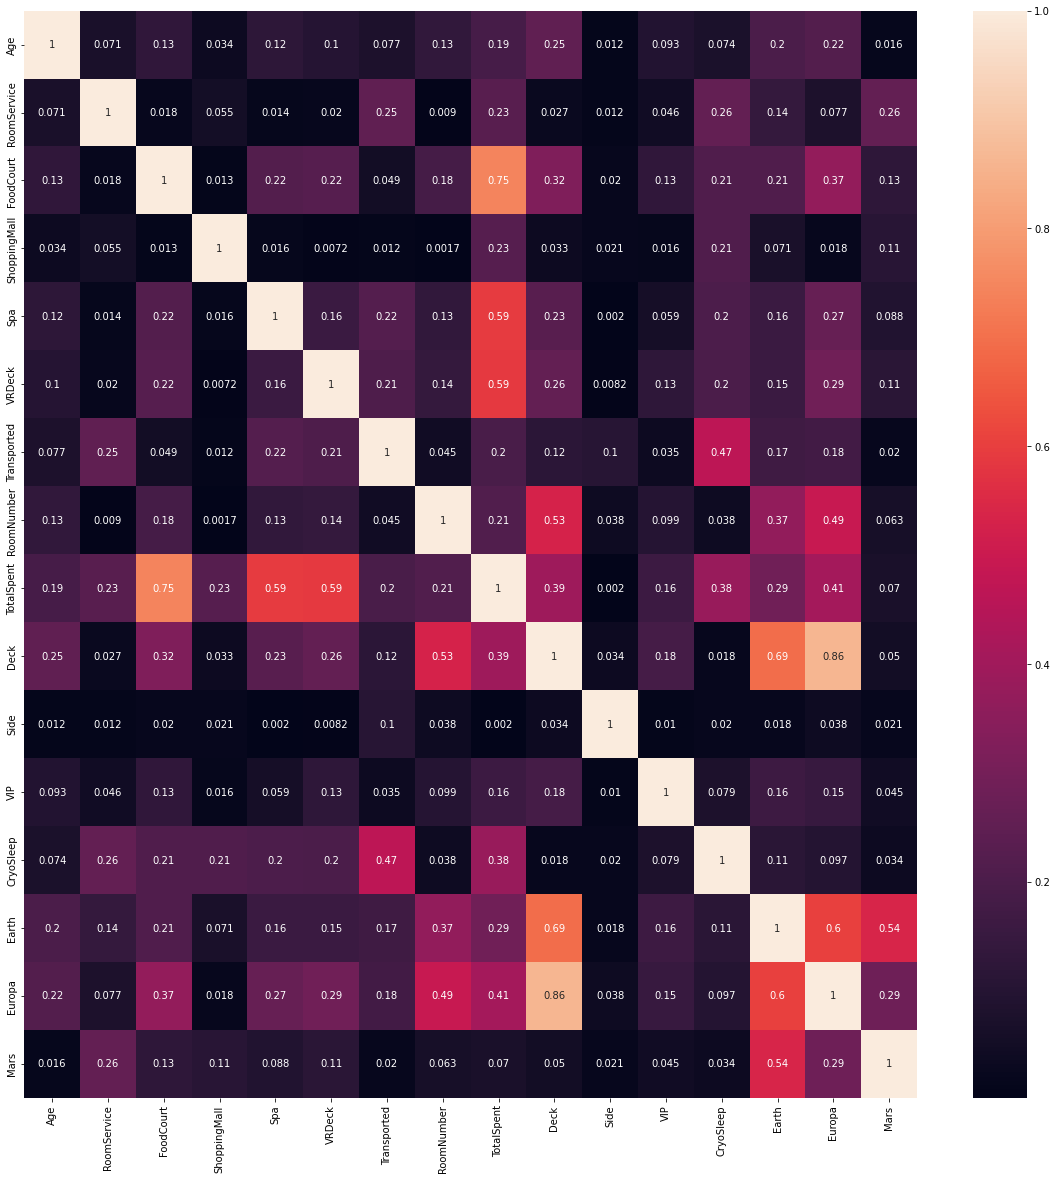

Most corrolated values to Transported
CryoSleep      0.467484
RoomService    0.248758
Spa            0.220264
VRDeck         0.207645
TotalSpent     0.196387
Europa         0.176303
Earth          0.168415
Deck           0.116462
Side           0.103775
Age            0.077213
Name: Transported, dtype: float64


In [24]:
correlationMatrix = pd.concat([dataset, encodedDeck, encodedSide, encodedVIP, encodedCryo, encodedHome], axis=1).corr()
display(correlationMatrix)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlationMatrix.abs(), annot=True, ax=ax)
plt.show()
print('Most corrolated values to Transported')
print(correlationMatrix['Transported'].drop('Transported').abs().sort_values(ascending=False)[0:10])

# Model selection

## Load test data

In [25]:
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

## Try models

In [26]:
selectedColumns = ['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet']
X = dataset[selectedColumns]
            
#TODO
# * StandardScaler
# * Log?
def createPipeline(clf):
    categorical_features = ['CryoSleep', 'HomePlanet']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
        ('onehot', OneHotEncoder(drop='first'))
    ])
    
    numeric_features = ['RoomService', 'Spa', 'VRDeck']
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

    return Pipeline([
        ('preprocessor', preprocessor),
        ('estimator', clf)
    ])

labelEnc = LabelEncoder()
labelEnc.fit([True, False])
y = labelEnc.transform(dataset['Transported'].loc[X.index])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression

In [27]:
logreg = createPipeline(LogisticRegression(random_state=1337))
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

params = [dict(
    estimator__penalty = ['l1'],
    estimator__C = np.logspace(0, 2, 3),
    estimator__solver = ['liblinear', 'saga']
), dict(
    estimator__penalty = ['l2'],
    estimator__C = np.logspace(0, 2, 3),
    estimator__solver = ['newton-cg', 'lbfgs']
    
), dict(
    estimator__penalty = ['elasticnet'],
    estimator__C = np.logspace(0, 2, 3),
    estimator__solver = ['saga'],
    estimator__l1_ratio = np.linspace(0,1, 5)
)]
cv = GridSearchCV(logreg, params)
cv.fit(X_train, y_train)
print(cv.best_params_, cv.best_score_)
#{'estimator__C': 10.0, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'} 0.7590875643855777

{'estimator__C': 10.0, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'} 0.7590875643855777


## Random Forest

In [28]:
rf = createPipeline(RandomForestClassifier(random_state=42))
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
#print(rf['preprocessor'][1]['onehot'].get_feature_names_out())
rf._final_estimator.feature_importances_

0.7745732783990583


array([0.26337763, 0.25669518, 0.24744694, 0.15063821, 0.06329766,
       0.01854438])

In [29]:
params = dict(
    estimator__max_features = ['sqrt', 'log2'],
    estimator__n_estimators = np.arange(100, 150, 10),
    estimator__min_samples_split = np.arange(2, 5, 1),
    estimator__criterion = ['gini', 'entropy']
)
cv = GridSearchCV(rf, params)
cv.fit(X_train, y_train)
print(cv.best_params_, cv.best_score_)
#{'estimator__criterion': 'gini', 'estimator__max_features': 'sqrt', 'estimator__min_samples_split': 4, 'estimator__n_estimators': 100} 0.7630610743193524


{'estimator__criterion': 'gini', 'estimator__max_features': 'sqrt', 'estimator__min_samples_split': 4, 'estimator__n_estimators': 100} 0.7630610743193524


## Gradient boosting

In [30]:
gb = createPipeline(GradientBoostingClassifier())
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.7969393761035903

In [31]:
xg = createPipeline(XGBClassifier(objective='binary:logistic', max_leaves=0))
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

params = dict(
    estimator__learning_rate = [0.01],#np.logspace(-3, -1, 3),
    estimator__n_estimators = [130],#np.arange(100, 150, 10),
    estimator__max_depth = np.arange(5, 10, 2),
    estimator__grow_policy = ['depthwise', 'lossguide']
)
cv = GridSearchCV(xg, params)
cv.fit(X_train, y_train)
print(cv.best_params_, cv.best_score_)
# {'estimator__grow_policy': 'depthwise', 'estimator__learning_rate': 0.01, 'estimator__max_depth': 7, 'estimator__n_estimators': 130} 0.7782192788815305

{'estimator__grow_policy': 'depthwise', 'estimator__learning_rate': 0.01, 'estimator__max_depth': 7, 'estimator__n_estimators': 130} 0.7782192788815305


# Create submission

In [32]:
pred = labelEnc.inverse_transform(gb.predict(test[selectedColumns]))
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': pred})
submission.to_csv('./submission.csv', index=False)